# Atividade 2 da Unidade 2

### Alunos
- Gabriel Silva de Jesus
- Gustavo Henrique Aragão Silva

In [1]:
from skimage.data import coins
import matplotlib.pyplot as plt
from skimage.transform import hough_circle_peaks, hough_circle
from skimage.filters import sobel
import numpy as np
from skimage.morphology import binary_opening, binary_closing
from skimage import color
from skimage.draw import circle_perimeter 

from math import sin, cos, radians, trunc



# Preparação da imagem

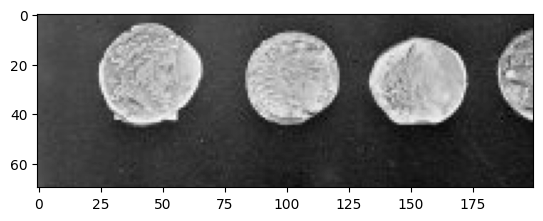

In [2]:
image = coins()[100:170,:200]

plt.imshow(image,cmap='gray')

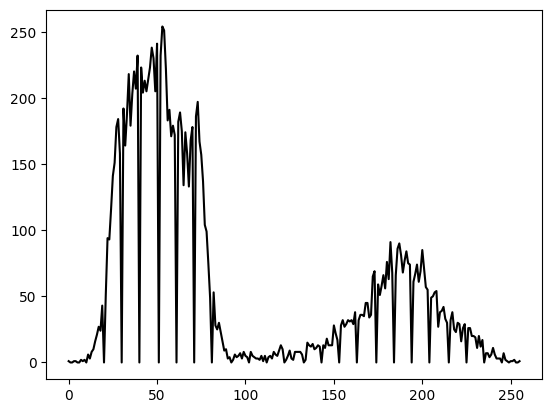

In [3]:
h = np.histogram (image.ravel(),bins=256)
plt.plot (h[0],'-k')

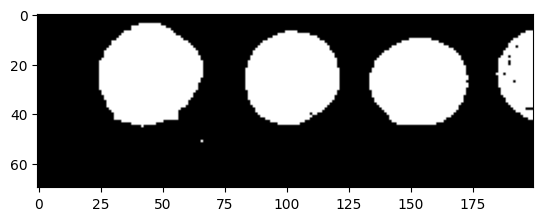

In [4]:
binary=image.copy()
limiar = image.max()*(110/256)
binary[binary<=limiar]=0
binary[binary>0]=1
plt.imshow(binary*255,cmap='gray')

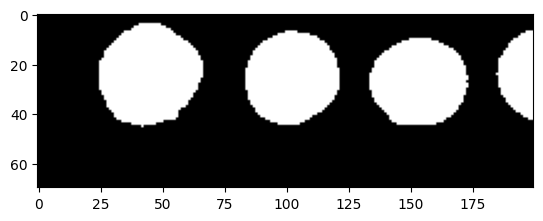

In [5]:
binary = binary_opening (binary)
binary = binary_closing (binary)
plt.imshow (binary,cmap='gray')

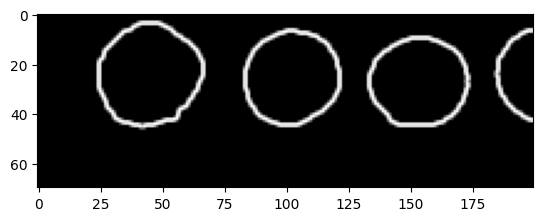

In [6]:
edges = sobel (binary)
plt.imshow(edges,cmap='gray')

# Experimento da atividade

#### Função para plotar os circulos na imagem.

In [7]:
raios = np.arange (16,36,2)

def plot_lines_to_image(a, b, raio):
    _, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    image_color = color.gray2rgb(image)
    for center_y, center_x, radius in zip(b, a, raio):
        circy, circx = circle_perimeter(center_y, center_x, radius,

        shape=image.shape)

        image_color[circy, circx] = (220, 20, 20)
        ax.imshow(image_color, cmap=plt.cm.gray)


#### Nossa função hough_circle

In [8]:
def my_hough_circle_transform(image, r):
    h, w = image.shape


    accumulador = np.zeros((h, w))
    centros = []

    for y in range(h):
        for x in range(w):
            if (image[y, x] > 0):
                for theta in range( 361):
                    a = int(x - r * cos(radians(theta)))
                    b = int(y - r * sin(radians(theta)))
                    if 0 <= a < w and 0 <= b < h:
                        accumulador[b, a ] += 1
                        centros.append((b, a))
    return accumulador, centros





## Comparando as duas funções

#### Aplicando Nossa hough_circle

my_hough_circle_transform


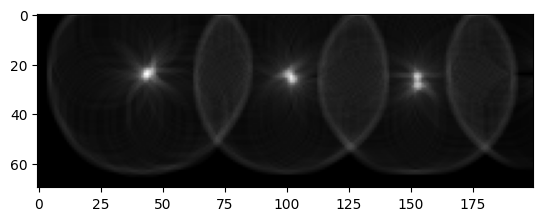

In [9]:
rad_fixed = 20


my_hough_circle_transform = my_hough_circle_transform(edges.copy(), rad_fixed)

print('my_hough_circle_transform')
plt.imshow (my_hough_circle_transform[0], cmap='gray')

#### Aplicando a do skimage

hough_circle scikitimage


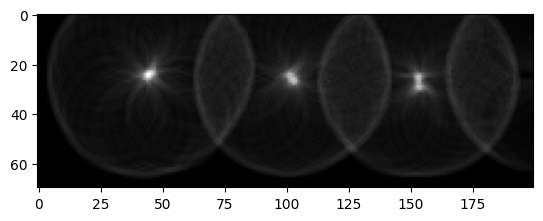

In [10]:

hough_grade = hough_circle(edges.copy(), rad_fixed)

print('hough_circle scikitimage')
plt.imshow (hough_grade[0], cmap='gray')

#### Escrevendo os circulos gerados por nossa função na imagem

Nossa função aplicada na imagem: 


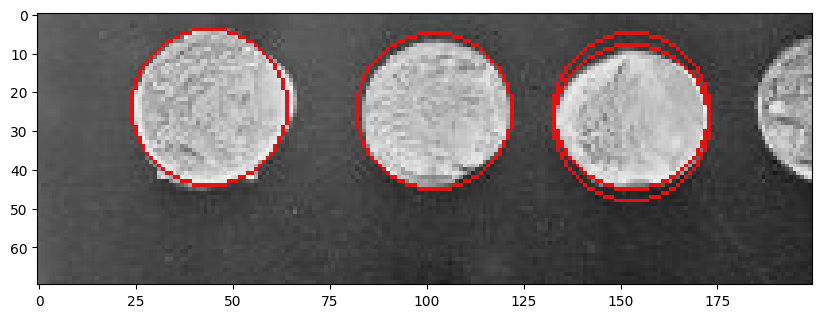

In [11]:
acumuladores_nossa, a_nossa, b_nossa, raio_nossa = hough_circle_peaks (my_hough_circle_transform, [20], total_num_peaks=10)
print('Nossa função aplicada na imagem: ')
plot_lines_to_image(a_nossa, b_nossa, raio_nossa)



#### Escrevendo os circulos da função do skimage na imagem

Função do scikitimage


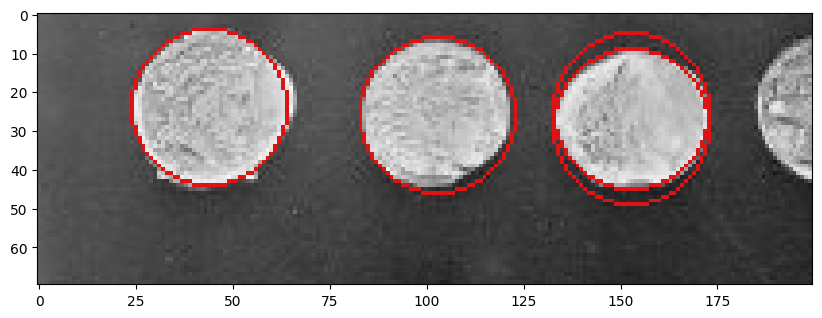

In [12]:

acumuladores_scikit, a_scikit, b_scikit, raio_scikit = hough_circle_peaks (hough_grade, [20], total_num_peaks=40)

print("Função do scikitimage")
plot_lines_to_image( a_scikit, b_scikit, raio_scikit)


#### Conclusão

Notou-se uma aproximação muito grande do resultado de uma unidade de diferença, entre os arrays de circulos gerados pelas duas funções, não ficou exatamente igual pois parece que a forma de arredondar os números está diferente, abaixo está uma comparação. Obs: testamos dom math.trunc também.

In [13]:
print('a e b da NOSSA função: ',    'a:', a_nossa, 'b:', b_nossa)
print('a e b do skimage func: ', 'a:', a_scikit, 'b:', b_scikit)

a e b da NOSSA função:  a: [ 44 102 153 153] b: [24 25 25 28]
a e b do skimage func:  a: [ 44 103 153 153] b: [24 26 25 29]


Veja que um ou outro valor parece ter sido truncado em uma unidade de diferença mas o resultado na imagem é praticamente o mesmo.